In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


#loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [3]:
df_GM = df[df['job_country'] == 'Germany'].copy()
df_GM['job_posted_month'] = df_GM['job_posted_date'].dt.strftime('%B')
df_GM_pivot = df_GM.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_GM_pivot = df_GM_pivot.reset_index()
df_GM_pivot['month_no'] = pd.to_datetime(df_GM_pivot['job_posted_month'], format='%B').dt.month
# Sort values WITHOUT inplace (safe for chaining)
df_GM_pivot = df_GM_pivot.sort_values('month_no')

# Set index WITHOUT inplace
df_GM_pivot = df_GM_pivot.set_index('job_posted_month')

# Drop column WITHOUT inplace
df_GM_pivot = df_GM_pivot.drop(columns='month_no')


In [4]:
df_GM_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,46,11,596,622,759,39,128,239,205,52
February,49,11,593,571,611,35,131,199,171,60
March,43,3,582,511,529,18,86,199,157,42
April,47,13,454,432,520,17,93,190,146,20
May,45,7,430,364,351,16,81,123,111,29
June,31,7,558,434,430,22,92,137,138,30
July,46,7,545,474,438,25,105,143,125,50
August,28,9,489,399,407,30,86,145,141,48
September,106,24,656,668,583,41,126,178,137,66


In [7]:
df_US_software_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')
df_US_software_pivot 

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [13]:
df_GM_merged = df_GM_pivot.merge(df_US_software_pivot, on='job_posted_month')
top_5 = df_GM_merged.sum().sort_values(ascending=False).head().index.to_list()
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Analyst']

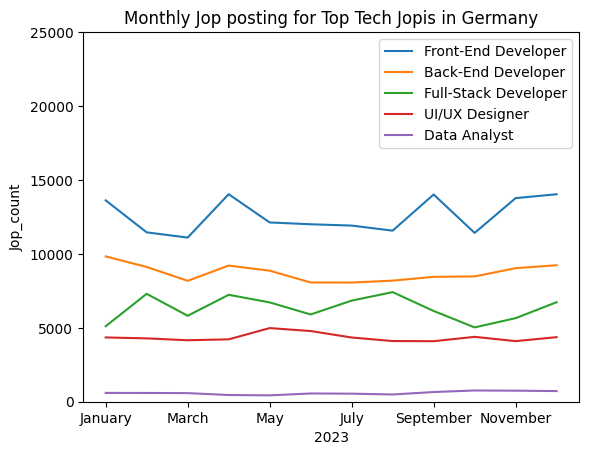

In [23]:
df_GM_merged[top_5].plot(kind='line')
plt.title('Monthly Jop posting for Top Tech Jopis in Germany')
plt.ylabel('Jop_count')
plt.xlabel('2023')
plt.ylim(0,25000)
plt.legend()
plt.show()
